<a href="https://colab.research.google.com/github/taiman9/Natural-language-processing/blob/main/Tweet_Emotion_Recognition_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

     |████████████████████████████████| 1.7 MB 13.1 MB/s 
     |████████████████████████████████| 243 kB 47.7 MB/s 


In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.6.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [3]:
dataset = nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [4]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [101]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [102]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [7]:
tweets, labels = get_tweet(train)

In [8]:
tweets[0], labels[0]

('i didnt feel humiliated', 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [75]:
tokenizer = Tokenizer(num_words=150000, oov_token='<UNK.')
tokenizer.fit_on_texts(tweets)

In [76]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [77]:
tweets[0]

'i didnt feel humiliated'

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

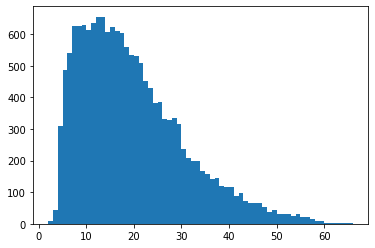

In [78]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [79]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [80]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [81]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [82]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [83]:
classes = set(labels)
print(classes)

{'fear', 'sadness', 'love', 'anger', 'surprise', 'joy'}


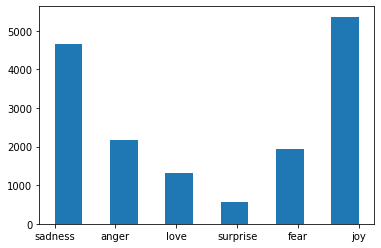

In [84]:
plt.hist(labels, bins=11)
plt.show()

In [85]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [86]:
class_to_index

{'anger': 3, 'fear': 0, 'joy': 5, 'love': 2, 'sadness': 1, 'surprise': 4}

In [87]:
index_to_class

{0: 'fear', 1: 'sadness', 2: 'love', 3: 'anger', 4: 'surprise', 5: 'joy'}

In [88]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [89]:
train_labels = names_to_ids(labels)
print(train_labels[0])

1


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [97]:
from keras.regularizers import l1

model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(20, activation='relu'), 
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(6, activation='softmax')                            
])

model.compile(
  
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [91]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 16)            160000    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 50, 40)            5920      
_________________________________________________________________
bidirectional_9 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 126       
Total params: 176,626
Trainable params: 176,626
Non-trainable params: 0
________________________________________________

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [92]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [93]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 1)

In [98]:
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kfold = KFold(n_splits=3, shuffle=True)

acc_per_fold, loss_per_fold = [],[]

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(padded_train_seq, train_labels):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  h = model.fit(
  padded_train_seq[train], train_labels[train],
  validation_data=(val_seq, val_labels),
  epochs=20,
  callbacks=[
             tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
            ]
  )

  # Generate generalization metrics
  scores = model.evaluate(padded_train_seq[test], train_labels[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
334/334 [==============================] - 24s 52ms/step - loss: 1.5269 - accuracy: 0.3904 - val_loss: 1.2650 - val_accuracy: 0.5205
Epoch 2/20
334/334 [==============================] - 16s 48ms/step - loss: 0.9335 - accuracy: 0.6551 - val_loss: 0.8379 - val_accuracy: 0.7030
Epoch 3/20
334/334 [==============================] - 16s 49ms/step - loss: 0.6042 - accuracy: 0.7941 - val_loss: 0.7318 - val_accuracy: 0.7750
Epoch 4/20
334/334 [==============================] - 16s 48ms/step - loss: 0.4540 - accuracy: 0.8498 - val_loss: 0.6716 - val_accuracy: 0.7870
Epoch 5/20
334/334 [==============================] - 16s 48ms/step - loss: 0.3565 - accuracy: 0.8861 - val_loss: 0.6573 - val_accuracy: 0.8020
Epoch 6/20
334/334 [==============================] - 16s 48ms/step - loss: 0.2951 - accuracy: 0.9083 - val_loss: 0.7151 - val_accuracy: 0.8010
Epoch 7/20
334/334 [===================

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

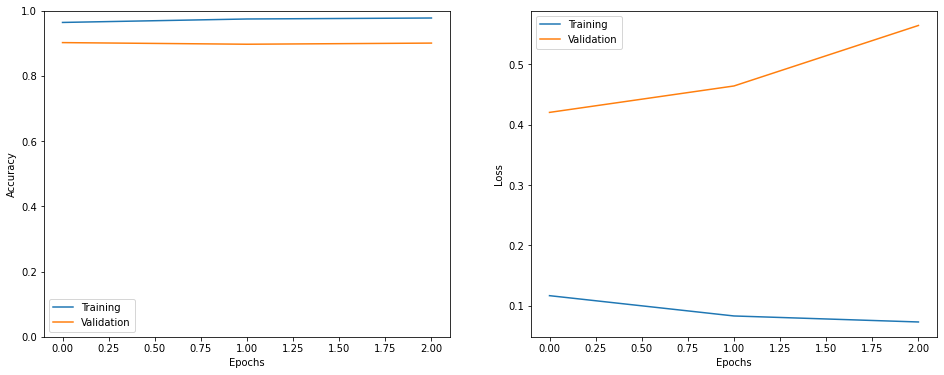

In [99]:
# Training history for last cross validation fold
show_history(h)

In [103]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [104]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 19ms/step - loss: 0.5087 - accuracy: 0.9005


In [105]:
i = random.randint(0, len(test_labels) - 2)
print('Sentence:', test_tweets[i])
print('Emotion:', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]
                                      
print('Predicted emotion:', pred_class)

Sentence: i just say the things that i want without even thinking what the person would feel its rude right
Emotion: anger
Predicted emotion: anger


In [106]:
preds = np.argmax(model.predict(test_seq), axis=1)

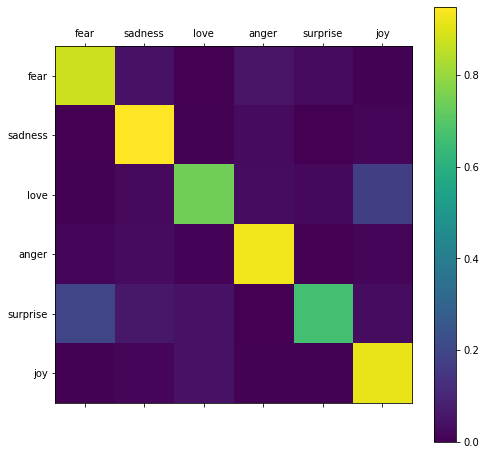

In [107]:
show_confusion_matrix(test_labels, preds, list(classes))